# Guia 3

## Ejercicio 2

Mediante el esquema de cinco particiones generadas con KFold, compare el desempeño del perceptrón multicapa con los siguientes clasificadores:

* Naive Bayes (GaussianNB)
* Análisis discriminante lineal (LDA)
* K vecinos más cercanos (KNN)
* Arbol de decisión (Decision Tree)
* Máquina de soporte vectorial (SVM)

Descripción de c/u:

* GaussianNB: Calcula la probabilidad de que cada dato pertenezca a cada clase y asigna la clase más probable.

* LDA: Calcula una frontera de decisión lineal para clasificar nuevos datos

* KNN: Para un dato nuevo, busca sus K vecinos más cercanos en el conjunto de entrenamiento y predice la clase que tenga mayoría entre los vecinos

* Decision Tree: Construye un árbol recursivamente donde cada nodo divide respecto de una característica. Las hojas son las clases finales

* SVM: Busca un hiperplano que separe las clases maximizando la distancia entre ellas. Puede usar kernels (funciones) para transformar los datos y hacerlos separables en un espacio de mayor dimensión


### Clasificadores

In [3]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from prettytable import TableStyle
import time

# Cargar dataset
digits = load_digits()
x=digits.data
y=digits.target 

# clasificadores
clasificadores = {
    'MLP': MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

### Entrenamiento

In [4]:
# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
metricas = {}

# analizar cada clasificador
for name, clf in clasificadores.items():
    # calcular tasas de acierto (accuracy)
    accs = []
    t_ini = time.time()
    for trn_idx, tst_idx in kf.split(x):
        x_trn, x_tst = x[trn_idx], x[tst_idx]
        y_trn, y_tst = y[trn_idx], y[tst_idx]

        # entrenar
        clf.fit(x_trn, y_trn)
        # medir
        y_pred = clf.predict(x_tst)
        acc = accuracy_score(y_tst, y_pred)
        accs.append(acc)

    mean_acc = np.mean(accs)
    var_acc = np.var(accs)
    t_total = time.time() - t_ini
    metricas[name] = (accs, mean_acc, var_acc, t_total)

### Comparacion

In [5]:
table = PrettyTable()
table.field_names = ["Clasificador", "Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "μ", "σ²", "TIEMPO"]

for name, (accs, mean_acc, var_acc, t_total) in metricas.items():
    table.add_row([name, *[f"{a:.4f}" for a in accs], f"{mean_acc:.4f}", f"{var_acc:.6f}", f"{t_total:.4f}"])

print(table)

+---------------+--------+--------+--------+--------+--------+--------+----------+--------+
|  Clasificador | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 |   μ    |    σ²    | TIEMPO |
+---------------+--------+--------+--------+--------+--------+--------+----------+--------+
|      MLP      | 0.9694 | 0.9722 | 0.9721 | 0.9749 | 0.9582 | 0.9694 | 0.000034 | 4.3175 |
|  Naive Bayes  | 0.8472 | 0.8472 | 0.8022 | 0.8579 | 0.8412 | 0.8392 | 0.000370 | 0.0230 |
|      LDA      | 0.9444 | 0.9750 | 0.9387 | 0.9666 | 0.9359 | 0.9521 | 0.000247 | 0.0823 |
|      KNN      | 0.9861 | 0.9944 | 0.9721 | 0.9944 | 0.9833 | 0.9861 | 0.000068 | 1.4176 |
| Decision Tree | 0.8417 | 0.8750 | 0.8524 | 0.8524 | 0.8635 | 0.8570 | 0.000129 | 0.1010 |
|      SVM      | 0.9778 | 0.9778 | 0.9721 | 0.9777 | 0.9694 | 0.9750 | 0.000013 | 0.1330 |
+---------------+--------+--------+--------+--------+--------+--------+----------+--------+


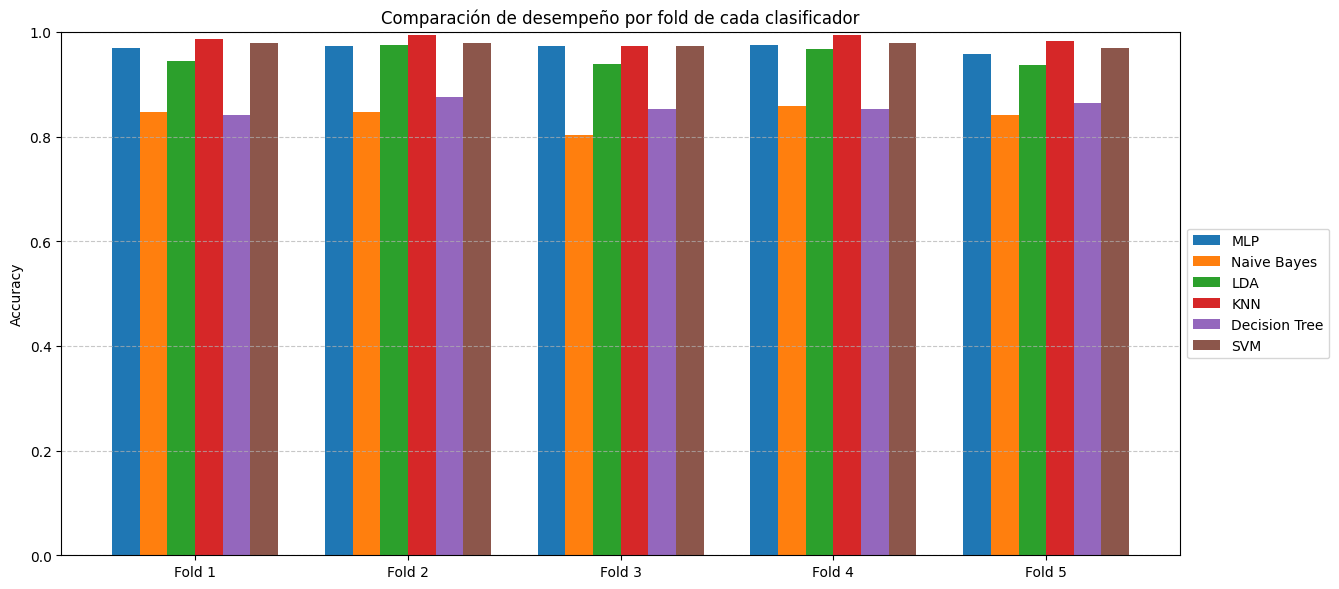

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

folds = 5
x = np.arange(folds)
width = 0.13

plt.figure(figsize=(12,6))
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b']

for i, (name, (accs, _, _, _)) in enumerate(metricas.items()):
    plt.bar(x + i*width, accs, width=width, color=colors[i], label=name)

plt.xticks(x + width*2.5, [f'Fold {i+1}' for i in range(folds)])
plt.ylabel('Accuracy')

# Ajustar límites del eje y al rango de datos
plt.ylim(0.7, 1.0)

plt.title('Comparación de desempeño por fold de cada clasificador')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
